# <center>CSIS 452 - Applied Machine Learning</center>
## Assignment 6 - due: 4/30/2020
In this assignment you will develop a Shallow Neural Network (SNN) for handwritten digit recognition using MNIST data set.

Enter your name as a comment in the cell below

In [1]:
#Matt Erickson

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

import keras
from keras import optimizers
from keras import losses
from keras import metrics
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import backend as K 
from keras import backend as K

Using TensorFlow backend.


The following function can be used to display a random sample of images along with targets and predicted class.

In [2]:
def display_a_random_sample_of_images(grid_size, images, targets, predictions=np.array([]), title="images"):
    """ 
    Displayes a random sample of images with the corresponding targets
    
    
    Argument:
        grid_size -- size of subplot will be grid_sizeXgrid_size.
        images -- an array of images 32x32  (num_images x 8 x 8)
        targets -- an array of class values (num_images x 1) containing class values 
             between 0 and 9  
        predictions -- an array of predicted class values (nume_images X 1) containig predicted
             class values between 0 and 9
    Returns:
        None
    """

    class_names = ['0','1','2','3','4','5','6','7','8','9']
    #reshape the images for display
    
    fig, axes1 = plt.subplots(grid_size,grid_size,figsize=(3,3))
    fig.suptitle(title, fontsize="x-small")
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.8, hspace=0.8)
    
    for j in range(grid_size):
        for k in range(grid_size):
            i = np.random.choice(range(len(images)))
            axes1[j][k].set_axis_off()
            if predictions.size > 0:
                axes1[j][k].set_title(class_names[targets[i]]+","+class_names[predictions[i]])
            else:
                axes1[j][k].set_title(class_names[targets[i]])
            axes1[j][k].title.set_fontsize(8)
            axes1[j][k].imshow(images[i, :,:], cmap = matplotlib.cm.binary, interpolation="nearest")

Let's first load the data set from keras datasets.  You will need to look at Keras datasets documentation, learn about the MNIST data set and develop the code below.

In [3]:
#Copy your code from last assignment and place it here
from keras.datasets import mnist
def load_digits():
    """
    Load and returns images and targets from the sklearn digits dataset.  
    
    Arguments: None
    
    #Returns: 
        images -- an array of digit images (num_imagesX8x8) 
               -- images are in normlaized form
        target_classes -- an array of class values (num_imagesX1) containing 
        class values between 0 and 9

    """    

    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    
    return X_train, y_train, X_test, y_test

Now, let's load the images and display a random sample of 9 images in a 3-by-3 grid along with their corresponding target class using the functions developed above.

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


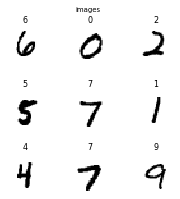

In [4]:
X_train, y_train, X_test, y_test = load_digits()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
np.random.seed(2)
display_a_random_sample_of_images(3, X_train, y_train, title="images")
plt.show()


## Expected output:
<img src="Figure1.png" width="20%" height="20%" align="left"> <br>


Next, we will reshape the train images from 60000 x 28 x 28 to 60000 x 784 and test images from 10000 x 28 x 28 to 10000 x 784. This way, each image will be represented with a vector of 784 pixel values. We will also reshape the targets to a rank-2 vector.

In [5]:
#Copy your code from last assignment and place it here
X_train_flat = np.reshape(X_train,(-1,784))
y_train_flat = np.reshape(y_train,(-1,1))
X_test_flat = np.reshape(X_test,(10000,784))
y_test_flat = np.reshape(y_test,(10000,1))

print(X_train_flat.shape, y_train_flat.shape, X_test_flat.shape, y_test_flat.shape)

(60000, 784) (60000, 1) (10000, 784) (10000, 1)


## Expected output:
(60000, 784) (60000, 1) (10000, 784) (10000, 1)

We will now develop and train a three-layer (nx-128(tanh)-64(tanh)-ny(softmax)) Shallow Neural Network and train it using the data we just extracted.

Let's OneHot encode the targets first

In [6]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
#y_train_1hot = cat_encoder.fit_transform(np.reshape(y_train_flat,(-1,1)))
#y_test_1hot = cat_encoder.fit_transform(np.reshape(y_test_flat,(-1,1)))
y_train_1hot = cat_encoder.fit_transform(y_train_flat)
y_test_1hot = cat_encoder.fit_transform(y_test_flat)
print(y_train_1hot.shape)
print(y_test_1hot.shape)

(60000, 10)
(10000, 10)


/home/matt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/matt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In

## Expected output:
(60000, 10)
(10000, 10)

Now, let's build the model and train the it.  Use validation_split of 0.1 to allow for a 10% validation set.  Keep in mind that this is a multi-class problem, so your loss should be <b>categorical_crossentropy</b> and for metrics use <b>accuracy</b>.

In [12]:
num_classes = 10
n_hidden1 = 128
n_hidden2 = 64
n_outputs = num_classes  

learning_rate = 0.01
num_epochs = 5
    
model = Sequential()

model.add(Dense(n_hidden1, activation='tanh',input_shape=(X_train_flat.shape[1],)))
model.add(Dense(n_hidden2, activation='tanh'))
model.add(Dense(n_outputs, activation='softmax'))

opt = keras.optimizers.SGD(lr=learning_rate)
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.SGD(lr=learning_rate),metrics=['acc'])

history = model.fit(X_train_flat, y_train_1hot,epochs=num_epochs,verbose=1, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 9s 174us/step - loss: 0.7898 - acc: 0.7748 - val_loss: 0.5112 - val_acc: 0.8592
Epoch 2/5
54000/54000 [==============================] - 9s 159us/step - loss: 0.5529 - acc: 0.8336 - val_loss: 0.5003 - val_acc: 0.8405
Epoch 3/5
54000/54000 [==============================] - 11s 199us/step - loss: 0.5345 - acc: 0.8370 - val_loss: 0.4386 - val_acc: 0.8685
Epoch 4/5
54000/54000 [==============================] - 10s 192us/step - loss: 0.4846 - acc: 0.8483 - val_loss: 0.3750 - val_acc: 0.8883
Epoch 5/5
54000/54000 [==============================] - 11s 196us/step - loss: 0.4584 - acc: 0.8582 - val_loss: 0.4006 - val_acc: 0.8795


Let's plot training curves and see how the model is doing on training and validation.

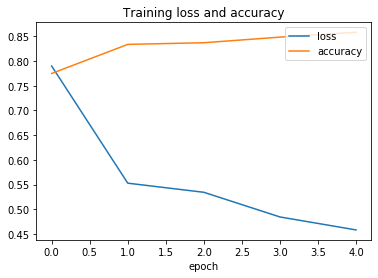

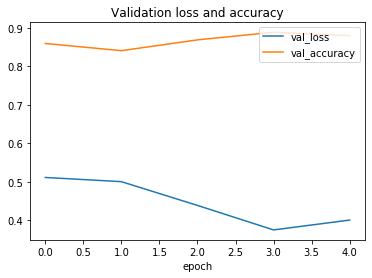

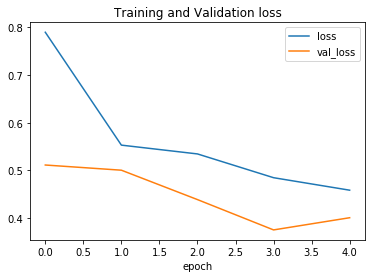

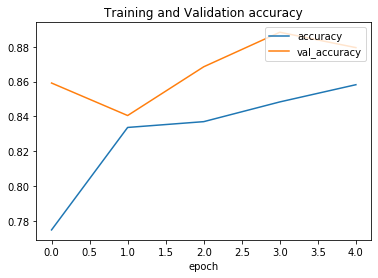

In [13]:
training_fig = plt.figure()
training_ax = training_fig.add_subplot(111)
training_ax.plot(history.history['loss'])
training_ax.plot(history.history['acc'])
training_ax.set_title('Training loss and accuracy')
training_ax.set_xlabel('epoch')
training_ax.legend(['loss', 'accuracy'], loc='upper right')

validation_fig = plt.figure()
validation_ax = validation_fig.add_subplot(111)
validation_ax.plot(history.history['val_loss'])
validation_ax.plot(history.history['val_acc'])
validation_ax.set_title('Validation loss and accuracy')
validation_ax.set_xlabel('epoch')
validation_ax.legend(['val_loss', 'val_accuracy'], loc='upper right')

tarin_val_loss_fig = plt.figure()
tarin_val_loss_ax = tarin_val_loss_fig.add_subplot(111)
tarin_val_loss_ax.plot(history.history['loss'])
tarin_val_loss_ax.plot(history.history['val_loss'])
tarin_val_loss_ax.set_title('Training and Validation loss')
tarin_val_loss_ax.set_xlabel('epoch')
tarin_val_loss_ax.legend(['loss', 'val_loss'], loc='upper right')

tarin_val_loss_fig = plt.figure()
tarin_val_loss_ax = tarin_val_loss_fig.add_subplot(111)
tarin_val_loss_ax.plot(history.history['acc'])
tarin_val_loss_ax.plot(history.history['val_acc'])
tarin_val_loss_ax.set_title('Training and Validation accuracy')
tarin_val_loss_ax.set_xlabel('epoch')
tarin_val_loss_ax.legend(['accuracy', 'val_accuracy'], loc='upper right')


plt.show()

## Expected output:
<p>Your plots should be similar to the ones below, but they won't be exact match</P>
<p><img src="Figure2.png" width="40%" height="40%" align="left"> <br></p>


Now let's evaluate the model on the training and test images.  First, we will need to get the h values.  Keep in mind that the we need to inverse transform the 1hot encoded labels to the original labels.

In [14]:
p_train_1hot = model.predict(X_train_flat)
h_train_1hot = np.array([elm for elm in p_train_1hot>0.5], dtype=int) #Convert probabilities to class labels)
h_train =  np.squeeze(cat_encoder.inverse_transform(h_train_1hot)) #Retrive original class labels)

p_train_1hot = model.predict(X_test_flat)
h_test_1hot = np.array([elm for elm in p_train_1hot>0.5], dtype=int) 
h_test =  np.squeeze(cat_encoder.inverse_transform(h_test_1hot)) 

Next, we will measure the model performance on the training set and test set using Confusion Matrix, Average Accuracy, Average Precision, Average Recall and Average F1-Score. 

In [15]:
#Revise your code from last assignment and place it here
cf_train = confusion_matrix(y_train_flat,h_train)
ca_train = np.mean(accuracy_score(np.squeeze(y_train_flat),h_train))
ps_train = np.mean(precision_score(y_train_flat,h_train, average="macro")) 
rs_train = np.mean(recall_score(y_train_flat,h_train,average="macro"))
f1_train = np.mean(f1_score(y_train_flat,h_train,average="macro"))
print("Training Performance")
print("Average Train Confusion Matrix:\n", cf_train)
print("Average Train Accuracy: {0:0.2%}".format(ca_train))
print("Average Train Precision {0:0.2%}".format(ps_train))
print("Average Train Recall: {0:0.2%}".format(rs_train))
print("Average Train F1: {0:0.2%}".format(f1_train))

cf_test = confusion_matrix(y_test_flat,h_test)
ca_test = accuracy_score(np.squeeze(y_test_flat),h_test)
ps_test = precision_score(y_test_flat,h_test,average="macro")
rs_test = recall_score(y_test_flat,h_test,average="macro")
f1_test = f1_score(y_test_flat,h_test,average="macro")
print("Training Performance")
print("Average Test Confusion Matrix:\n", cf_test)
print("Average Test Accuracy: {0:0.2%}".format(ca_test))
print("Average Test Precision {0:0.2%}".format(ps_test))
print("Average Test Recall {0:0.2%}".format(rs_test))
print("Average Test F1: {0:0.2%}".format(f1_test))

Training Performance
Average Train Confusion Matrix:
 [[5651    0    8   20   15   29  103   10   77   10]
 [ 118 6442   38   14    3   16   15   11   75   10]
 [ 603   71 4715   93   87    6  115   62  194   12]
 [ 878   18  147 4467    4  209   30   56  264   58]
 [ 543   19   26    0 4840   39   76   14   23  262]
 [ 761   19   17   92   62 4155   99   14  172   30]
 [ 403   17   28    2  168   88 5149    0   60    3]
 [ 349   38   53   16   62   21    2 5434   29  261]
 [ 670   63   39   84   36  259   35    2 4618   45]
 [ 970   11   29   34  470  158    6  144   72 4055]]
Average Train Accuracy: 82.54%
Average Train Precision 85.47%
Average Train Recall: 82.33%
Average Train F1: 82.94%
Training Performance
Average Test Confusion Matrix:
 [[ 945    1    0    1    1    5   16    3    7    1]
 [  13 1096    3    4    0    3    3    1   11    1]
 [ 114   11  822   15    8    0   16    8   38    0]
 [ 156    1   14  748    3   27    2   17   36    6]
 [ 106    0    4    0  803    7   

## Expected output:
<p> You performance should be close to the following, it won't be exact.</p>
<p><img src="Figure4.png" width="40%" height="40%" align="left"> <br></p>


Finally, let's examine a set of images and compare their predicted and actual labels.

TypeError: list indices must be integers or slices, not numpy.float64

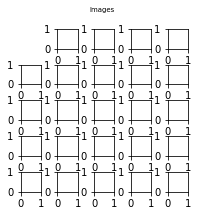

In [21]:
np.random.seed(5)
#Place your code from last assignment here
display_a_random_sample_of_images(5, X_test,y_test,h_test,title="Images")

## Expected output:
<p> You output should be close to the following, but it won't be exact.</p>
<p><img src="Figure5.png" width="20%" height="20%" align="left"> <br></p>